# Python Assignment - 2 (Ecommerce-UK Retailer)
##  Name: Komal More 
### Batch: DSAPR01

Context of Data : 
    
* Company - UK-based and registered non-store online retail 
* Products for selling - Mainly all-occasion gifts 
* Customers - Most are wholesalers (local or international) 
* Transactions Period - 1st Dec 2010 - 9th Dec 2011 (One year) 

In [305]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### * Loading the Data

In [306]:
df = pd.read_csv(r'Ecommerce - EDA - UK Retailer.csv', encoding = 'latin1')

In [307]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### * Drop The Null Values 

In [309]:
# df.isnull().sum()

-> Description and Customer Id are the key measures we cannot replace it with mean, mode or median so we drop the null record

In [310]:
# df.dropna(subset = ["Description"], inplace = True)
# df.dropna(subset = ["CustomerID"], inplace = True)

In [311]:
# df.isnull().sum()

-> Null Values Dropped

### * Drop The Negative Values

In [312]:
# df.describe()

In [313]:
# df.drop(df[df['Quantity'] < 0].index, inplace = True)
# df.drop(df[df['UnitPrice'] < 0].index, inplace = True)

In [314]:
# df.describe()

-> Record Containing Negative(-) Values Has Been Dropped.

In [315]:
# df.info()

-> Data is clean now

### 1) Perform Basic EDA -

##### a) Boxplot – All Numeric Variables

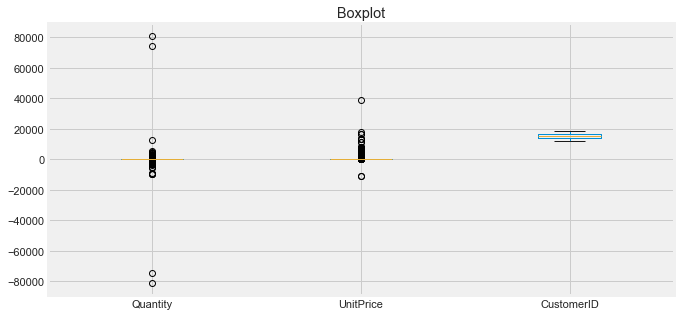

In [316]:
plt.figure(figsize = (10, 5))

plt.title('Boxplot')
df.boxplot()
plt.show()

##### b) Histogram – All Numeric Variables

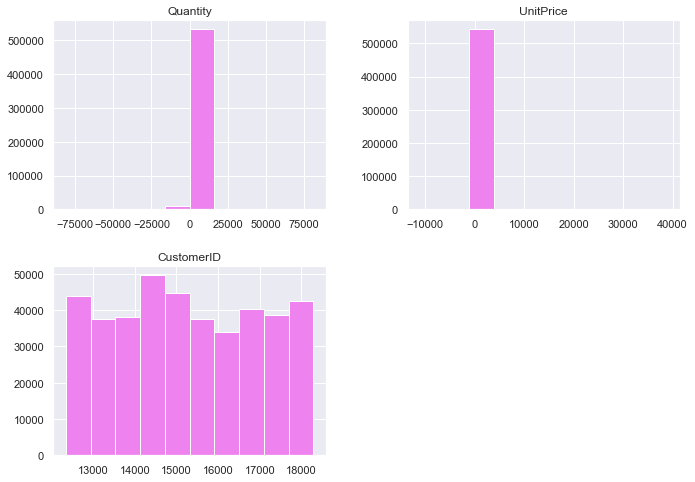

In [317]:
sns.set()
df.hist(color = 'violet', figsize = (10,8))
plt.show()

##### c) Distribution Plot – All Numeric Variables

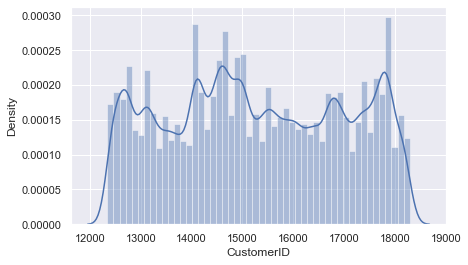

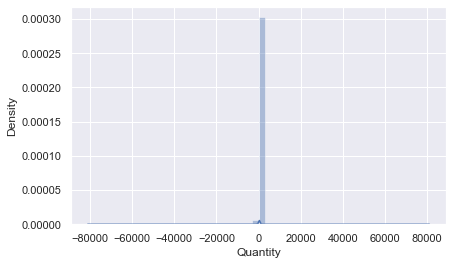

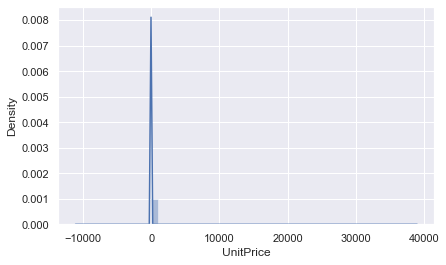

In [318]:
sns.set

sns.distplot(df['CustomerID'])
plt.show()

sns.distplot(df['Quantity'])
plt.show()

sns.distplot(df['UnitPrice'])
plt.show()

##### d) Aggregation for all numerical Columns

In [319]:
df['UnitPrice'].aggregate('sum')

2498803.974

In [320]:
df['CustomerID'].aggregate('sum')

6219475867.0

In [321]:
df['Quantity'].aggregate('sum')

5176450

##### e) Unique Values across all columns 


In [322]:
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

##### f) Duplicate values across all columns 

In [323]:
df.duplicated().sum()

5268

##### g) Correlation – Heatmap - All Numeric Variables

In [324]:
df.corr()

,Quantity,UnitPrice,CustomerID
Quantity,1.000000,-0.001235,-0.00360
UnitPrice,-0.001235,1.000000,-0.00456
CustomerID,-0.003600,-0.004560,1.00000


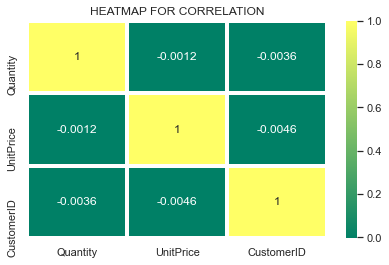

In [325]:
# plt.figure(figsize = (10,8))

sns.heatmap(df.corr(), linewidths = 3, cmap = 'summer', annot = True)
plt.title("HEATMAP FOR CORRELATION")
plt.show()

##### h) Regression Plot - All Numeric Variables 

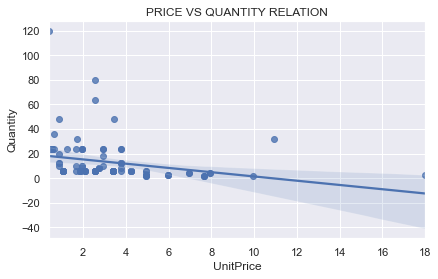

In [326]:
# plt.figure(figsize = (10,5))

sns.regplot(x = 'UnitPrice', y = 'Quantity', data = df[:100], fit_reg = True)
plt.title("PRICE VS QUANTITY RELATION")
plt.show()

##### i) Bar Plot – Every Categorical Variable vs every Numerical Variable 

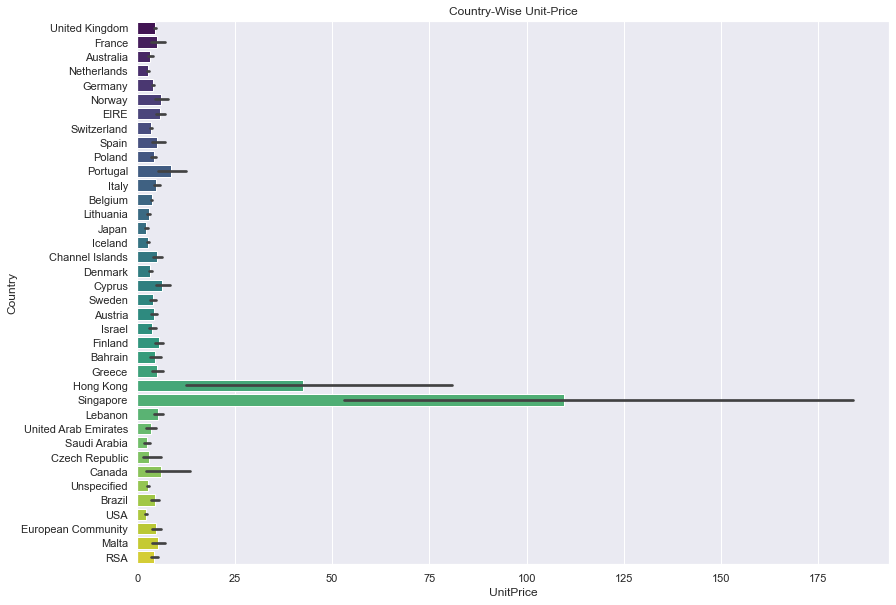

In [327]:
plt.figure(figsize = (12,10))

sns.barplot(x = 'UnitPrice', y = 'Country', data = df, palette = 'viridis')
plt.title('Country-Wise Unit-Price')
plt.show()

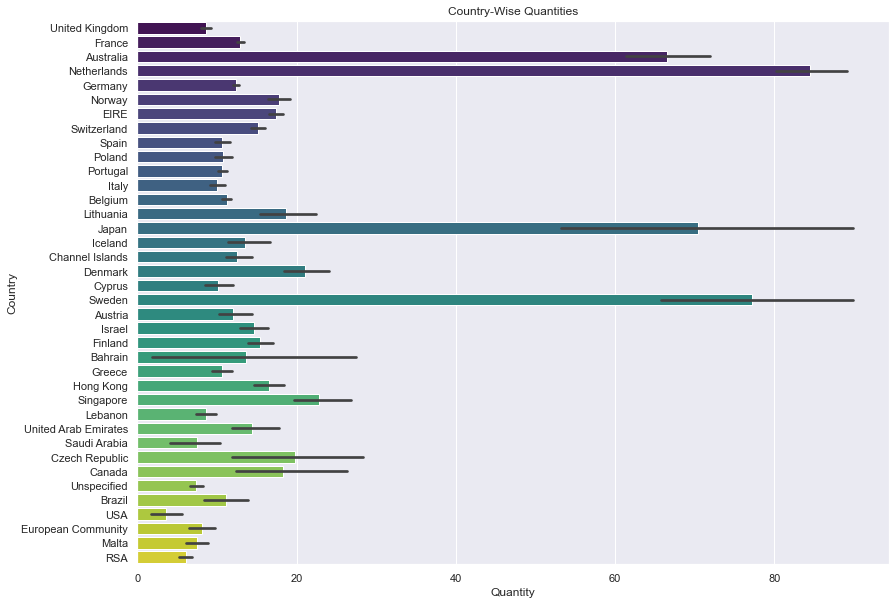

In [328]:
plt.figure(figsize = (12,10))

sns.barplot(x = 'Quantity', y = 'Country', data = df, palette = 'viridis')
plt.title('Country-Wise Quantities')
plt.show()

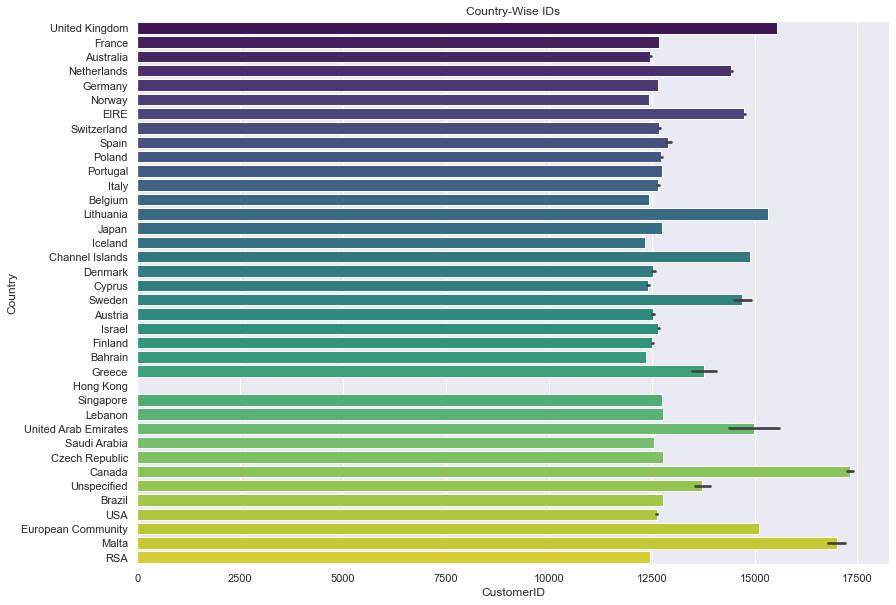

In [329]:
plt.figure(figsize = (12,10))

sns.barplot(x = 'CustomerID', y = 'Country', data = df, palette = 'viridis')
plt.title('Country-Wise IDs')
plt.show()

##### j) Pair plot - All Numeric Variables

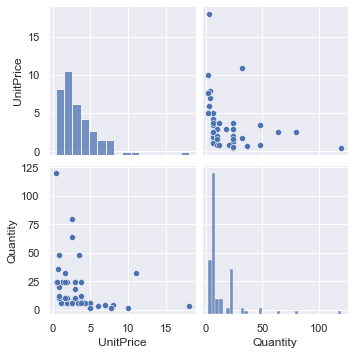

In [330]:
sns.pairplot(df[:100], vars = ['UnitPrice','Quantity'])
plt.show()

##### k) Line chart to show the trend of data - All Numeric/Date Variables 

In [331]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [332]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df["Invoice_Year"] = df['InvoiceDate'].dt.year
df["Invoice_Month"] = df['InvoiceDate'].dt.month

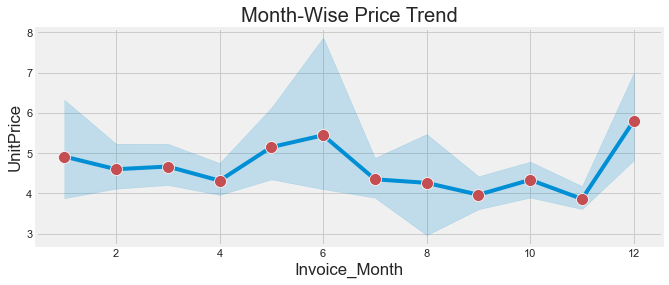

In [333]:
plt.figure(figsize = (10,4))

plt.style.use('fivethirtyeight')
sns.lineplot(y = 'UnitPrice', x = 'Invoice_Month', data = df, marker = 'o', markerfacecolor = 'r', markersize = 12)
plt.title('Month-Wise Price Trend');

##### l) Plot the skewness - All Numeric Variables 

In [334]:
df.skew(axis = 0, numeric_only = True)

Quantity          -0.264076
UnitPrice        186.506972
CustomerID         0.029835
Invoice_Year      -3.137135
Invoice_Month     -0.414813
dtype: float64

In [335]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_Year,Invoice_Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12


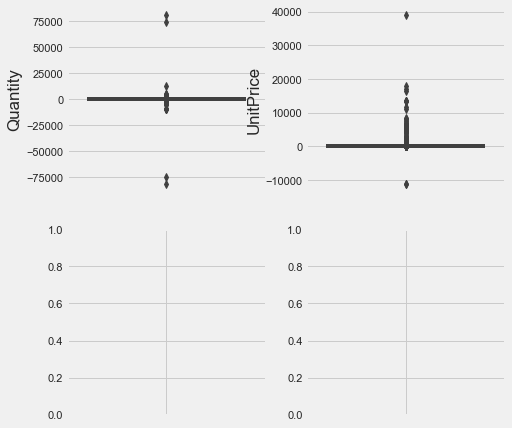

In [338]:
fig, axes = plt.subplots(2, 2, figsize = (7, 7), sharex = True)

sns.boxplot(y ='Quantity', data = df, ax = axes[0,0])
sns.boxplot(y ='UnitPrice', data = df, ax = axes[0,1])

plt.show()

### 2) Check for missing values in all columns and replace them with the appropriate metric (Mean/Median/Mode) 

In [339]:
df.isnull().sum()

InvoiceNo             0
StockCode             0
Description        1454
Quantity              0
InvoiceDate           0
UnitPrice             0
CustomerID       135080
Country               0
Invoice_Year          0
Invoice_Month         0
dtype: int64

In [340]:
#df['CustomerID'].fillna(df['CustomerID'].mean(), inplace=True)
#df['Description'].fillna(df['Description'].mode()[0], inplace=True)

df.dropna(subset = ["CustomerID"], inplace = True)
df.dropna(subset = ["Description"], inplace = True)

In [341]:
df.isnull().sum()

InvoiceNo        0
StockCode        0
Description      0
Quantity         0
InvoiceDate      0
UnitPrice        0
CustomerID       0
Country          0
Invoice_Year     0
Invoice_Month    0
dtype: int64

-> Missing value in Description & CustomerID column replaced

### 3) Remove duplicate rows

In [342]:
df.duplicated().sum()

5225

In [343]:
df.drop_duplicates(keep = False,inplace=True)

In [344]:
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_Year,Invoice_Month


-> Duplicated Rows Removed

### 4) Remove rows which have negative values in Quantity column

In [345]:
df.describe()

,Quantity,UnitPrice,CustomerID,Invoice_Year,Invoice_Month
count,396767.000000,396767.000000,396767.000000,396767.000000,396767.000000
mean,12.298913,3.487053,15275.108517,2010.934707,7.585497
std,251.781170,70.187448,1714.401947,0.247042,3.416029
min,-80995.000000,0.000000,12346.000000,2010.000000,1.000000
25%,2.000000,1.250000,13919.000000,2011.000000,5.000000
50%,5.000000,1.950000,15132.000000,2011.000000,8.000000
75%,12.000000,3.750000,16779.000000,2011.000000,11.000000
max,80995.000000,38970.000000,18287.000000,2011.000000,12.000000


In [346]:
df.drop(df[df['Quantity'] < 0].index, inplace = True)

In [347]:
df.describe()

,Quantity,UnitPrice,CustomerID,Invoice_Year,Invoice_Month
count,387923.000000,387923.00000,387923.000000,387923.000000,387923.000000
mean,13.278617,3.13463,15281.620997,2010.934959,7.591965
std,182.690206,22.37660,1713.954340,0.246599,3.413568
min,1.000000,0.00000,12346.000000,2010.000000,1.000000
25%,2.000000,1.25000,13941.000000,2011.000000,5.000000
50%,6.000000,1.95000,15144.000000,2011.000000,8.000000
75%,12.000000,3.75000,16788.000000,2011.000000,11.000000
max,80995.000000,8142.75000,18287.000000,2011.000000,12.000000


-> Negative values observed in quantity column has removed

### 5) Add the columns - Month, Day and Hour for the invoice 

In [348]:
df["year"] = pd.DatetimeIndex(df['InvoiceDate']).year
df["month"] = pd.DatetimeIndex(df['InvoiceDate']).month
df["day"] = pd.DatetimeIndex(df['InvoiceDate']).day
df["hour"] = pd.DatetimeIndex(df['InvoiceDate']).hour

In [349]:
df.head(3)

#df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_Year,Invoice_Month,year,month,day,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,2010,12,1,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,2010,12,1,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,2010,12,1,8


### 6) How many orders made by the customers? 

In [350]:
TOTAL = df.InvoiceNo.count()
print('Total orders made by Customers is,',TOTAL)

Total orders made by Customers is, 387923


### 7) TOP 5 customers with higher number of orders

In [351]:
order_per_head.sort_values("InvoiceNo", ascending = False, ignore_index = True).head()

,CustomerID,InvoiceNo
0,12748.0,210
1,14911.0,201
2,17841.0,124
3,13089.0,97
4,14606.0,93


### 8) How much money spent by the customers? 

In [352]:
df["Sales"] = df["Quantity"] * df["UnitPrice"]
df.head(3)                                             # Adding Sales column to the dataset to find actually cost spent

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_Year,Invoice_Month,year,month,day,hour,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,2010,12,1,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,2010,12,1,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,2010,12,1,8,22.00


In [353]:
print("Total money spend : ",df["Sales"].sum())                     # Total money spend by the customers in the year

Total money spend :  8864767.054


### 9) TOP 5 customers with highest money spent 

In [354]:
money_per_head.sort_values("Sales", ascending = False, ignore_index = True).head()

,CustomerID,Sales
0,14646.0,280206.02
1,18102.0,259657.30
2,17450.0,194230.79
3,16446.0,168472.50
4,14911.0,143597.28


### 10) How many orders per month? 

In [355]:
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_Year,Invoice_Month,year,month,day,hour,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,2010,12,1,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,2010,12,1,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,2010,12,1,8,22.00


In [356]:
order_per_month = df.groupby("month")["InvoiceNo"].nunique().reset_index()
order_per_month

,month,InvoiceNo
0,1,987
1,2,998
2,3,1321
3,4,1149
4,5,1555
5,6,1392
6,7,1331
7,8,1281
8,9,1756
9,10,1929


### 11) How many orders per day? 

In [357]:
order_per_day = df.groupby("day")["InvoiceNo"].nunique().reset_index()
order_per_day

,day,InvoiceNo
0,1,709
1,2,613
2,3,520
3,4,629
4,5,723
5,6,800
6,7,773
7,8,771
8,9,660
9,10,627


### 12) How many orders per hour? 

In [358]:
order_per_hour = df.groupby("hour")["InvoiceNo"].nunique().reset_index()
order_per_hour

,hour,InvoiceNo
0,6,1
1,7,29
2,8,555
3,9,1394
4,10,2226
5,11,2277
6,12,3130
7,13,2637
8,14,2275
9,15,2038


### 13) How many orders for each country?

In [359]:
order_each_country = df.groupby("Country")["InvoiceNo"].nunique().reset_index()
order_each_country

,Country,InvoiceNo
0,Australia,57
1,Austria,17
2,Bahrain,2
3,Belgium,98
4,Brazil,1
5,Canada,6
6,Channel Islands,26
7,Cyprus,16
8,Czech Republic,2
9,Denmark,18


### 14) Orders trend across months

In [360]:
orders_trend = df.groupby(['month'])['InvoiceNo'].count()
orders_trend

month
1     20769
2     19495
3     26592
4     22240
5     27840
6     26710
7     26344
8     26586
9     39335
10    48099
11    61914
12    41999
Name: InvoiceNo, dtype: int64

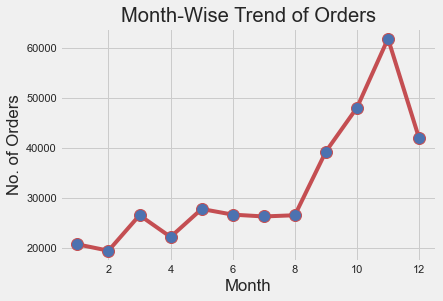

In [361]:
orders_trend.plot.line(color = 'r', marker = 'o', markerfacecolor = 'b', markersize = 12)

plt.title('Month-Wise Trend of Orders')

plt.xlabel('Month')
plt.ylabel('No. of Orders'); 

### 15) How much money spent by each country?

In [362]:
CS = df.groupby('Country')['Sales'].count().sort_values(ascending = False)
CS

Country
United Kingdom          344490
Germany                   9012
France                    8312
EIRE                      7218
Spain                     2475
Netherlands               2363
Belgium                   2031
Switzerland               1842
Portugal                  1445
Australia                 1183
Norway                    1072
Italy                      758
Channel Islands            746
Finland                    685
Cyprus                     593
Sweden                     449
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     242
Unspecified                238
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon                     45


-> United Kingdome is one sided winner if we talk about money spent 

## END